In [7]:
### Datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

#Skelearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

# from yellowbrick.cluster import silhouette_visualizer

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Descripción del problema

# Exploración de los datos

In [8]:
rod = pd.read_excel('../data/rod/simulation_results.xlsx')
rod.head()

,ID,leak_dia,leak_distance,pressure,flow_pipe,rod,leak_flow
0,0,3.5,15.3333,1190,76.752,31.966865,152.279497
1,1,3.5,7.6667,653,189.540,17.530478,93.460428
2,2,3.5,7.6667,653,58.729,16.312640,81.364855
3,3,3.5,7.6667,1016,76.752,26.121132,129.525084
4,4,3.5,15.3333,1016,189.540,22.906330,127.163212


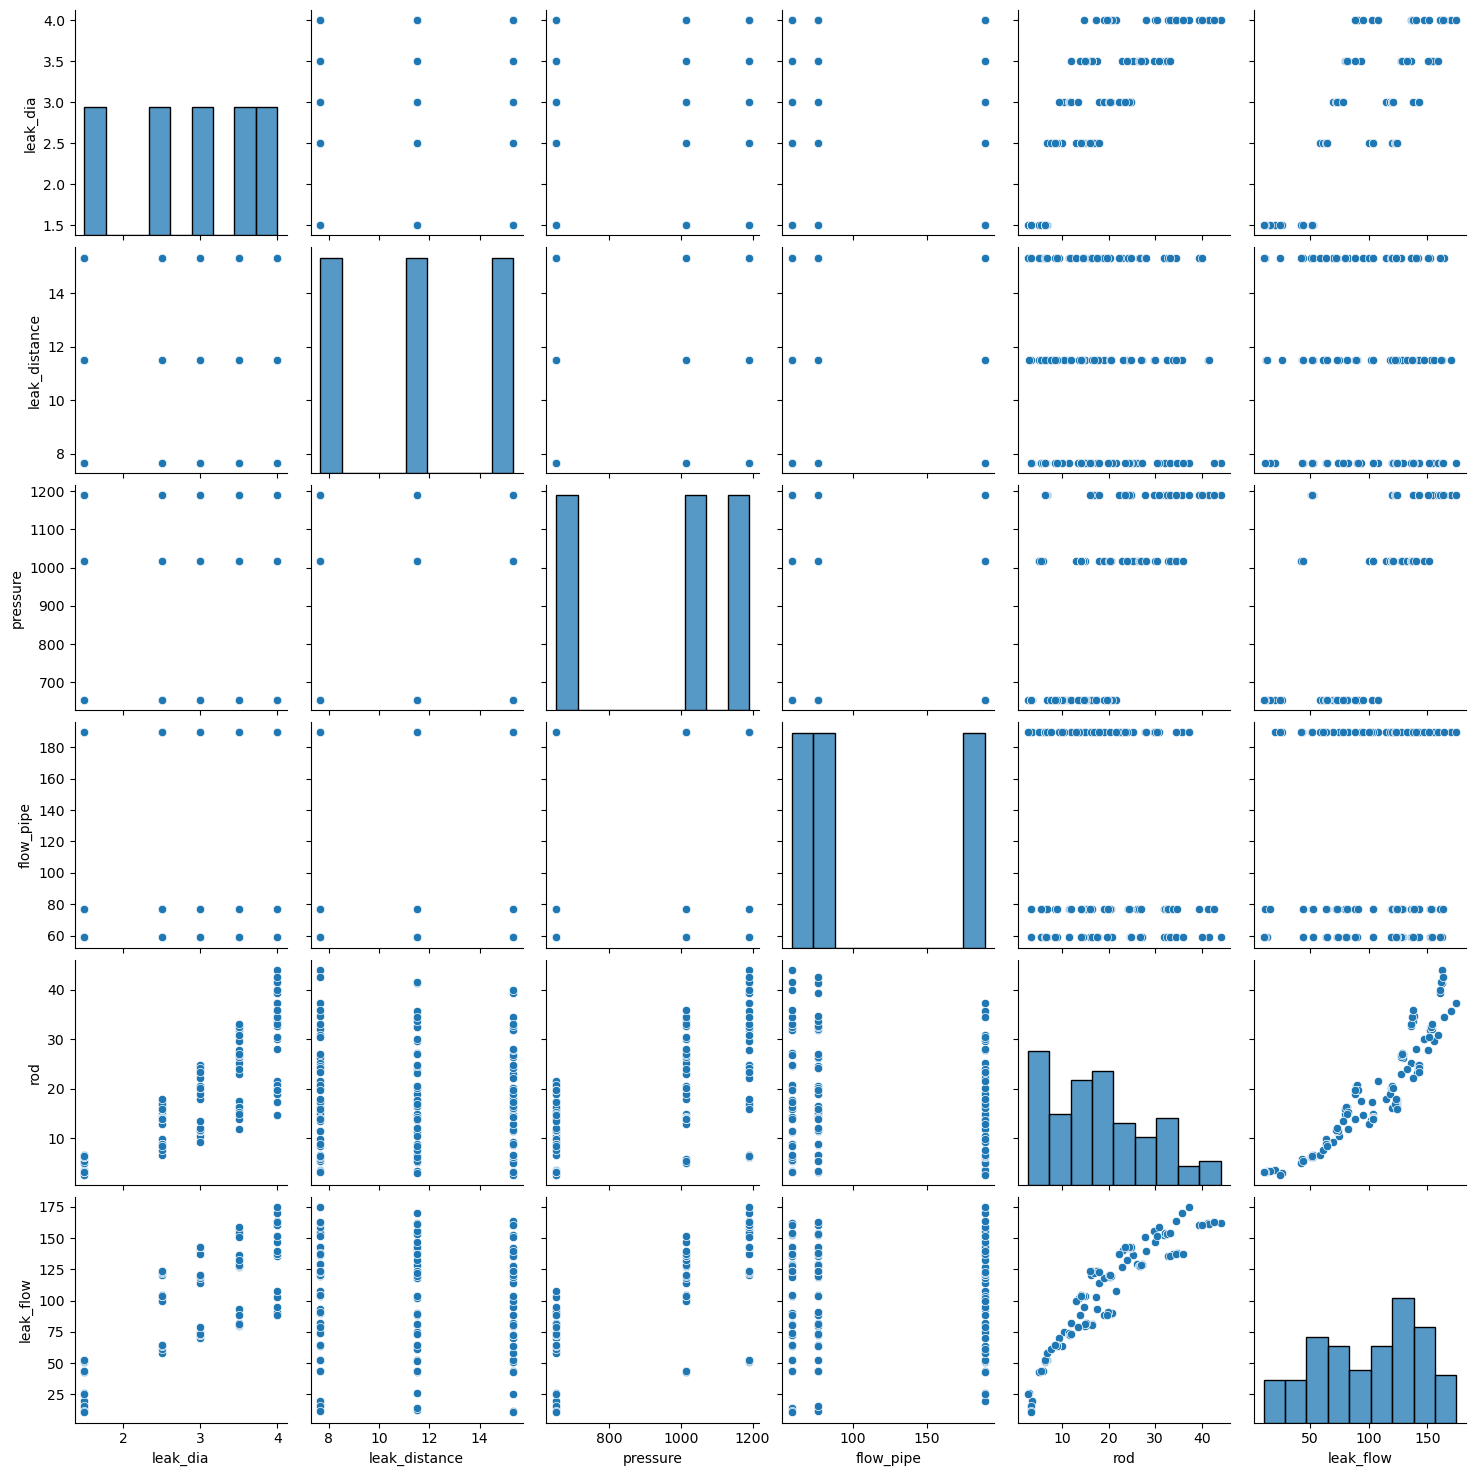

In [9]:
sns.pairplot(rod.drop(columns=["ID"]))

In [ ]:
#rod.drop(columns=['ID','leak_flow'], inplace=True)
rod_f = rod.drop(columns=['ID','rod'])
rod_rod = rod.drop(columns=['ID','leak_flow'])
rod.drop(columns=['ID'], inplace=True)
rod_nor = preprocessing.scale(rod)

Text(0.5, 0, 'Número de clusters')

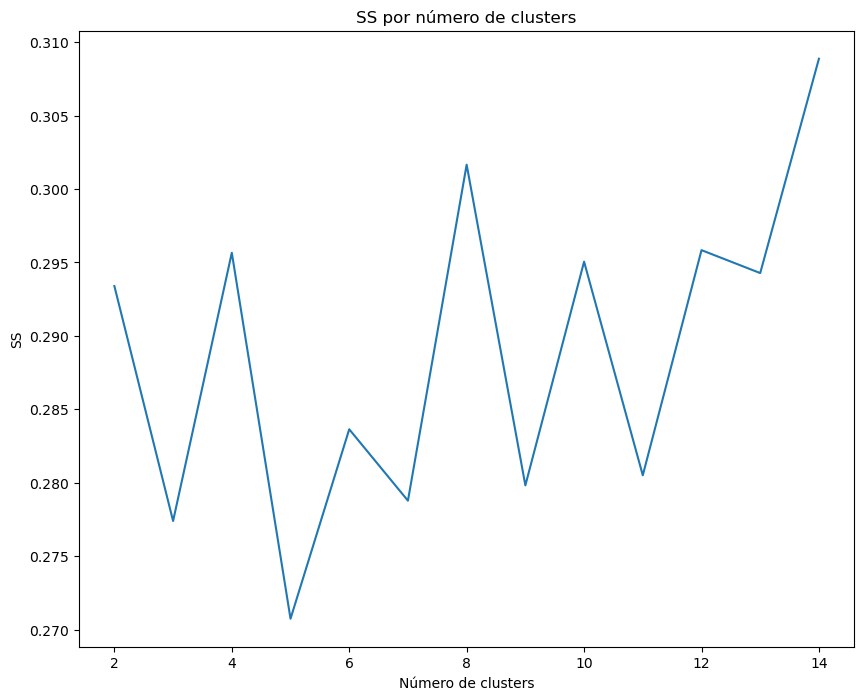

In [ ]:
plt.figure(figsize=(10,8))
ss =[]
maxRange = 15
for i in range(2,maxRange):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(rod_nor)
  ss.append(silhouette_score(rod_nor, kmeans.labels_))
plt.plot(range(2,maxRange), ss)
plt.title('SS por número de clusters')
plt.ylabel('SS')
plt.xlabel('Número de clusters')

In [ ]:
#Escojo un modelo de 2 cluster por tener el mayor ss
kmeans = KMeans(n_clusters=9, init='k-means++')
model = kmeans.fit(rod_nor)

#Guardo los clusters en el rdb recodificado
rod['Cluster'] = model.labels_

In [ ]:
rod.head()

,leak_dia,leak_distance,pressure,flow_pipe,rod,leak_flow,Cluster
0,3.5,15.3333,1190,76.752,31.966865,152.279497,4
1,3.5,7.6667,653,189.540,17.530478,93.460428,6
2,3.5,7.6667,653,58.729,16.312640,81.364855,2
3,3.5,7.6667,1016,76.752,26.121132,129.525084,7
4,3.5,15.3333,1016,189.540,22.906330,127.163212,3


In [ ]:
rod.groupby(['Cluster']).describe()['pressure']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,14.0,1140.285714,81.572458,1016.0,1059.5,1190.0,1190.0,1190.0
1,18.0,953.000000,230.195313,653.0,653.0,1016.0,1190.0,1190.0
2,24.0,653.000000,0.000000,653.0,653.0,653.0,653.0,653.0
3,11.0,1095.090909,90.868536,1016.0,1016.0,1016.0,1190.0,1190.0
4,14.0,1090.571429,89.358151,1016.0,1016.0,1016.0,1190.0,1190.0
5,13.0,1109.692308,90.284167,1016.0,1016.0,1190.0,1190.0,1190.0
6,12.0,653.000000,0.000000,653.0,653.0,653.0,653.0,653.0
7,20.0,1085.600000,87.456696,1016.0,1016.0,1016.0,1190.0,1190.0
8,9.0,953.000000,237.279898,653.0,653.0,1016.0,1190.0,1190.0


In [ ]:
rod.columns

Index(['leak_dia', 'leak_distance', 'pressure', 'flow_pipe', 'rod',
       'leak_flow', 'Cluster'],
      dtype='object')

<AxesSubplot: >

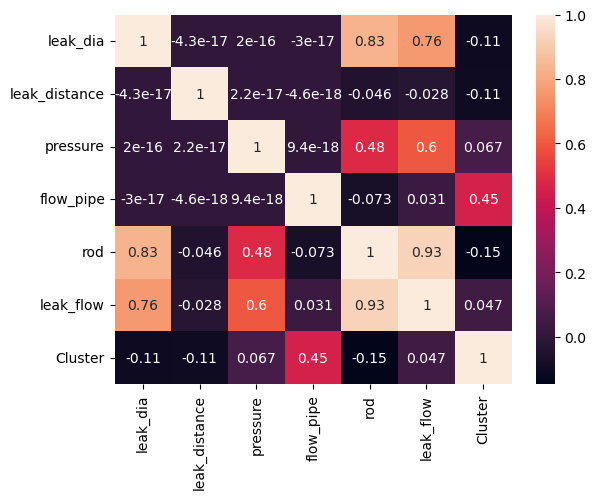

In [ ]:
sns.heatmap(rod.corr(), annot=True)

In [ ]:
#rod.groupby(['Cluster']).describe()['flow_pipe']

In [ ]:
#px.scatter(rod,y='rod', x='pressure', color='Cluster', hover_data='leak_distance')

In [ ]:
#px.scatter(rod,y='rod', x='Cluster', color='Cluster', hover_data='leak_distance')

In [ ]:
#rod[rod['Cluster'] == 0]

In [ ]:
rod_rod.columns

Index(['leak_dia', 'leak_distance', 'pressure', 'flow_pipe', 'rod'], dtype='object')

In [ ]:
X, y = rod_rod.drop(columns=["rod"]), rod_rod["rod"] 
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
len(Xtrain)

108

In [ ]:
len(ytrain)

108

# Modelos

- Regresión lineal
- Arboles de regresión
- Random forest de regresión

## Regresión lineal

In [ ]:
modelo1 = smf.ols(formula='rod~leak_dia+leak_distance+pressure+flow_pipe', data = rod_rod).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                    rod   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     417.6
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           3.96e-73
Time:                        00:24:30   Log-Likelihood:                -332.02
No. Observations:                 135   AIC:                             674.0
Df Residuals:                     130   BIC:                             688.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -29.5944      1.711    -17.294

In [ ]:
modelo2 = smf.ols(formula='rod~pressure+leak_dia', data = rod_rod).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                    rod   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     762.3
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           3.09e-73
Time:                        00:24:30   Log-Likelihood:                -338.66
No. Observations:                 135   AIC:                             683.3
Df Residuals:                     132   BIC:                             692.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.8173      1.430    -22.957      0.0

<AxesSubplot: >

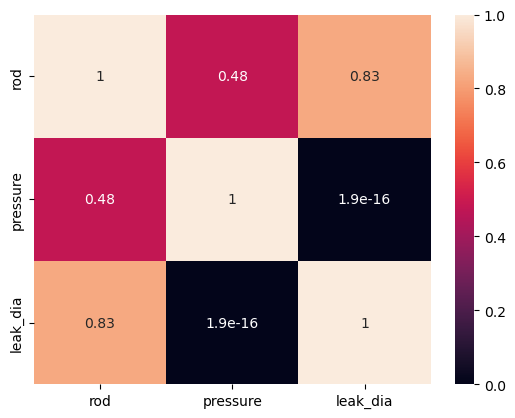

In [ ]:
sns.heatmap(rod[["rod","pressure","leak_dia"]].corr(), annot=True)

In [ ]:
reg2 = LinearRegression().fit(Xtrain[["pressure", "leak_dia"]], ytrain)
predict_train = reg2.predict(Xtrain[["pressure", "leak_dia"]])
result = pd.DataFrame({
  'ytrain' : ytrain,
  'ypredict' : predict_train
})
result["resid"] = result["ypredict"] - result["ytrain"]
result

,ytrain,ypredict,resid
35,24.098663,24.258522,0.159859
60,5.377068,5.490478,0.113411
33,10.405617,12.548393,2.142777
87,20.535308,22.530860,1.995553
134,15.885361,19.267289,3.381928
...,...,...,...
17,26.394368,25.455412,-0.938956
98,20.688858,22.530860,1.842002
66,3.575235,-2.425307,-6.000542
126,8.780877,7.557160,-1.223718


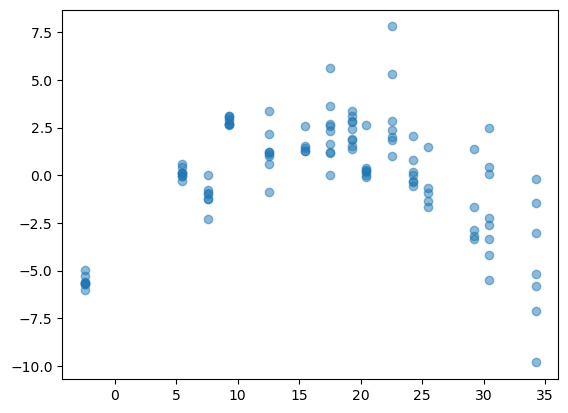

In [ ]:
# Linealidad:

plt.scatter(result["ypredict"], result["resid"], alpha=0.5)

<AxesSubplot: xlabel='resid', ylabel='Count'>

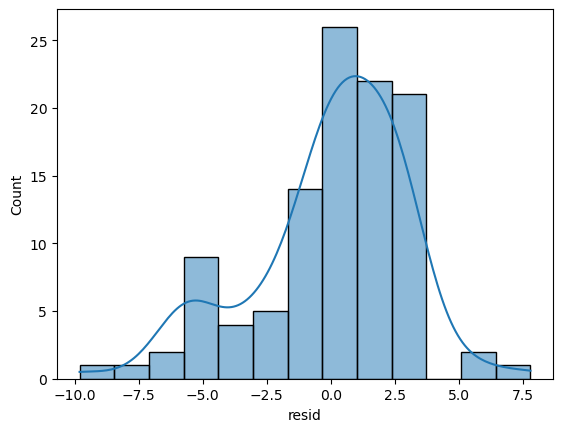

In [ ]:
sns.histplot(result["resid"], kde=True)

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from scipy.stats import shapiro

Estadístico: 0.9404, p-valor: 0.0001
Los residuos no siguen una distribución normal.


<Figure size 800x600 with 0 Axes>

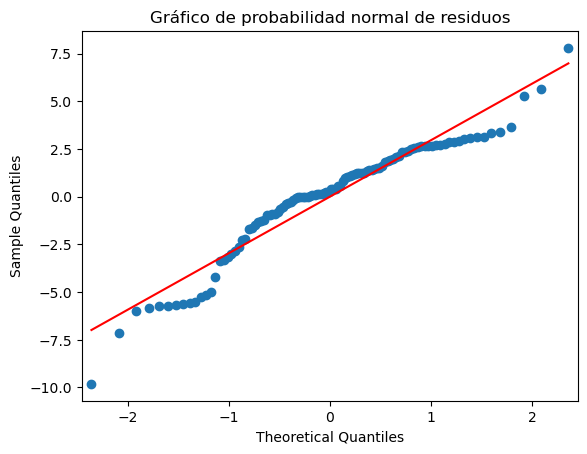

In [ ]:
stat, p_val = shapiro(result["resid"])
print(f'Estadístico: {stat:.4f}, p-valor: {p_val:.4f}')
if p_val < 0.05:
    print('Los residuos no siguen una distribución normal.')
else:
    print('Los residuos siguen una distribución normal.')

plt.figure(figsize=(8, 6))
sm.qqplot(result["resid"], line='s')
plt.title('Gráfico de probabilidad normal de residuos')
plt.show()

In [ ]:
reg = LinearRegression().fit(Xtrain, ytrain)
reg.score(Xtrain, ytrain)
reg.score(Xtest, ytest)
predict = reg.predict(Xtest)
predict
result = pd.DataFrame({
  'y' : ytest,
  'y2' : predict
})
result

,y,y2
124,14.361671,15.496888
88,18.999514,22.371518
100,19.783897,23.448515
105,42.635636,35.139040
4,22.906330,24.028296
119,8.787098,7.932585
74,5.446510,5.850164
99,34.512408,31.012818
112,14.894760,15.120339
0,31.966865,29.069565


In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),    ('linear', LinearRegression(fit_intercept=False))])
model.fit(Xtrain, ytrain)
model.score(Xtrain, ytrain)

predict = model.predict(Xtest)
result = pd.DataFrame({
  'y' : ytest,
  'y2' : predict
})
result


,y,y2
124,14.361671,14.369025
88,18.999514,19.033526
100,19.783897,20.765558
105,42.635636,41.626617
4,22.906330,22.611952
119,8.787098,8.097848
74,5.446510,5.487280
99,34.512408,34.970784
112,14.894760,14.507798
0,31.966865,31.259154


In [ ]:
test_results = pd.read_excel('../data/rod/test_results.xlsx')
X, y = test_results.drop(columns=["rod", 'leak_flow']), test_results["rod"] 
predict = model.predict(X)
result = pd.DataFrame({
  'y' : y,
  'y2' : predict
})
model.score(X,y)

0.9952602624247056